In [2]:
import numpy as np

In [5]:
'''
Data type
'''
#list
a = [1, 3., 'rrr']
print(type(a))
print(np.shape(a))
a.append(2.)
print(np.shape(a))

<type 'list'>
(3,)
(4,)
<type 'numpy.ndarray'>
['1' '3.0' 'rrr' '2.0']


In [6]:
#ndarray
b = np.array(a)
print(type(b))
print(b)

<type 'numpy.ndarray'>
['1' '3.0' 'rrr' '2.0']


In [13]:
#array operation
a = np.array([[1., 2., 3.],[4.,5.,6.]])
print(a)
print(np.shape(a))
b = a.T
print(b)
print(np.shape(b))
c = a*a
print(c)
d = np.dot(a,b**2)
print(d)

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
(2, 3)
[[ 1.  4.]
 [ 2.  5.]
 [ 3.  6.]]
(3, 2)
[[  1.   4.   9.]
 [ 16.  25.  36.]]
[[  36.  174.]
 [  78.  405.]]


In [14]:
#tuple
a = (23, [34,1.,7],'ee')
print(type(a))

<type 'tuple'>


In [16]:
'''
for loop
'''
for i in range(10):
    print(i)
print(' ')
for i in range(0,10,2):
    print(i)

0
1
2
3
4
5
6
7
8
9
 
0
2
4
6
8


In [17]:
'''
if...else
'''
for i in range(10):
    if np.mod(i,2)==0:
        print(i)

0
2
4
6
8


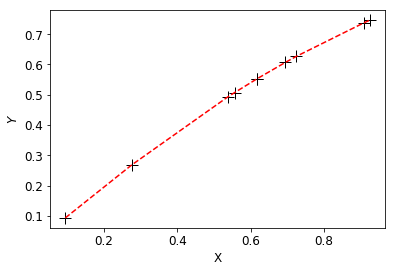

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

x = np.random.rand(10)
x = np.sort(x)
y = np.arctan(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y,'k+',markersize=12)
ax.plot(x,y,'r--')
ax.set_xlabel('X',fontsize=12)
ax.set_ylabel(r'$Y$',fontsize=12)
fig.show()


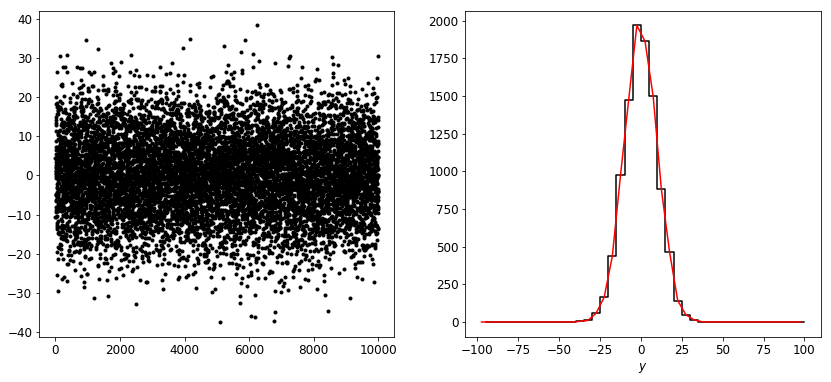

In [36]:
x = np.random.normal(0.,10.,size=10000)

xgrid = np.arange(-100,105,5)
xcenter = (xgrid[1:]+xgrid[:-1])/2.
hx,xedge = np.histogram(x,bins=xgrid)

fig = plt.figure(figsize=[14,6])
ax = fig.add_subplot(121)
ax.plot(x,'k.')

ax = fig.add_subplot(122)
ax.step(xedge[1:],hx,'k-')
ax.plot(xcenter,hx,'r-')
ax.set_xlabel(r'$y$',fontsize=12)
fig.show()

escape 0.210 sec


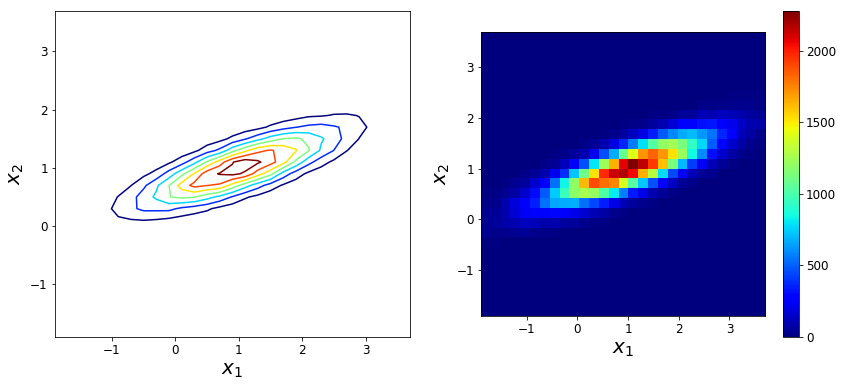

In [51]:
import scipy.stats as stats
import time

start = time.time()
mu = np.array([1.,1.])
s1 = 1.
s2 = 0.2
rho = 0.8
sig = np.array([[s1, rho*np.sqrt(s1*s2)],[rho*np.sqrt(s1*s2),s2]])
#generate random numbers from 2D normal distribution
xx = np.random.multivariate_normal(mu,sig,100000) 
xgrid = np.arange(-2.,4.,0.2)
ygrid = np.arange(-2.,4.,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
ycenter = (ygrid[0:-1]+ygrid[1:])/2.
#make 2d histogram
hxx,xedge,yedge = np.histogram2d(xx[:,0],xx[:,1],bins=[xgrid,ygrid])

fig = plt.figure(figsize=[14,6])
plt.set_cmap('jet')
ax = fig.add_subplot(121)
ax.contour(xcenter,ycenter,hxx.T)
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)

ax = fig.add_subplot(122)
e = ax.imshow(hxx.T,extent=[xcenter[0],xcenter[-1],ycenter[-1],ycenter[0]])
plt.colorbar(e)
ax.set_ylim([ycenter[0],ycenter[-1]])
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)

fig.show()
print('escape %(s).3f sec' % {'s':time.time()-start})

In [48]:
'''
Read/write files
'''

f = open('Riess1998_Tab5.txt')
line = f.readline()
for line in f:
    cols = line.split()
    print(cols)
f.close()


['1996H', '0.62', '23.23(0.19)', '23.56(0.18)', '-0.42(0.16)', '0.00', '42.98(0.17)']
['1996I', '0.57', '23.35(0.28)', '23.59(0.26)', '-0.06(0.26)', '0.00', '42.76(0.19)']
['1996J', '0.30', '22.23(0.12)', '22.21(0.11)', '-0.22(0.10)', '0.24', '41.38(0.24)']
['1996K', '0.38', '22.64(0.12)', '22.84(0.14)', '0.29(0.06)', '0.00', '41.63(0.20)']
['1996U', '0.43', '22.78(0.22)', '22.98(0.30)', '-0.52(0.29)', '0.00', '42.55(0.25)']
['1997ce', '0.44', '22.85(0.09)', '22.95(0.09)', '0.07(0.08)', '0.00', '41.95(0.17)']
['1997cj', '0.50', '23.19(0.11)', '23.29(0.12)', '-0.04(0.11)', '0.00', '42.40(0.17)']
['1997ck', '0.97', '24.78(0.25)', '\\ldots', '-0.19(0.23)', '\\ldots', '44.39(0.30)']
['1995K', '0.48', '22.91(0.13)', '23.08(0.20)', '-0.33(0.26)', '0.00', '42.45(0.17)']


In [ ]:
import astropy.io.fits as fits

def readImage(filename):
    hdulist = fits.open(filename)
    im = hdulist[0].data.copy()
    hdulist.close()
    return im

def writeImage(im,filename):
    hdulist = fits.open(filename)
    im = hdulist[0].data.copy()
    hdulist.close()
    return im

im = readImage('image.fits')
fig = plt.figure()
plt.set_cmap('jet')
ax = fig.add_subplot(111)
e = ax.imshow(im)
plt.colorbar(e)
#ax.set_ylim()
fig.show()

1316.84096117


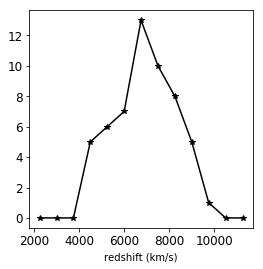

In [41]:
def loadData(filename):
    '''
    Read fits data
    
    '''
    tchfits = fits.open(filename)
    tabl = tchfits[1].data
    return tabl

filename = 'ComaCluster.fits'
coma = loadData(filename)
cz = coma.czA[(coma.czA<20000) & (coma.czA>0)]
sig_cz = np.var(cz)
print np.sqrt(sig_cz)
zgrid =np.arange(2000.,12000.,750.)
h, xedge = np.histogram(cz, bins=zgrid)
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.plot(zgrid[0:-1]+250.,h,'k*-')
ax.set_xlabel('redshift (km/s)')
fig.show()

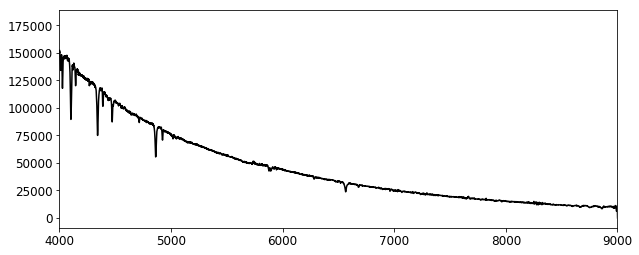

In [42]:
#read a spectrum fits file
filename = '351110104.fits'
tchfits = fits.open(filename)
log_wv0 = tchfits[0].header['CRVAL1']
log_dwv = tchfits[0].header['CD1_1']

sp = tchfits[0].data

N = len(sp[0,:])
wv = 10**(log_wv0+np.arange(0,N,1)*log_dwv)

fig = plt.figure(figsize=[10,4])
ax = fig.add_subplot(111)
ax.plot(wv,sp[0,:],'k-')
ax.set_xlim([4000,9000])
fig.show()

In [ ]:
'''
write table fits
'''
from astropy.table import Table
t = Table([[1, 2], [4, 5], [7, 8]], names=('a', 'b', 'c'))
t.write('table1.fits', format='fits')

c1 = fits.Column(name='a', array=np.array([1, 2]), format='K')
c2 = fits.Column(name='b', array=np.array([4, 5]), format='K')
c3 = fits.Column(name='c', array=np.array([7, 8]), format='K')
t = fits.BinTableHDU.from_columns([c1, c2, c3])
t.writeto('table2.fits')